<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 4

## Q1:Discrete FFT and Power Spectrum

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
jb=hourdata[1,:]

/Users/jklymak/anaconda/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


**1** Using the data from the hourly time series at Deep Cove (`dc`), show that the canned `fft` routine returns the correct discrete Fourier Transform of a suitable subset of the data (your choice on what subset).  You can do this graphically, by comparing the amplitude and the phase of the Fourier components, or simply show that the resulting numbers are the same.  

Some Hints: 
  - ignore bad data (rather than dealing with it "properly").  Make sure the units of your FT are: $\mathrm{^oC\, s}$.
  - If you want to compute the DFT efficiently, form the matrix $F$ referred to in the notes, and plot some of the time series associated with the different entries and make sure they look like Sines and Cosines and that the edge conditions are what you want.  Alternately, you can use your dft routine from the last assignment, and chose your frequencies properly.


/Users/jklymak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


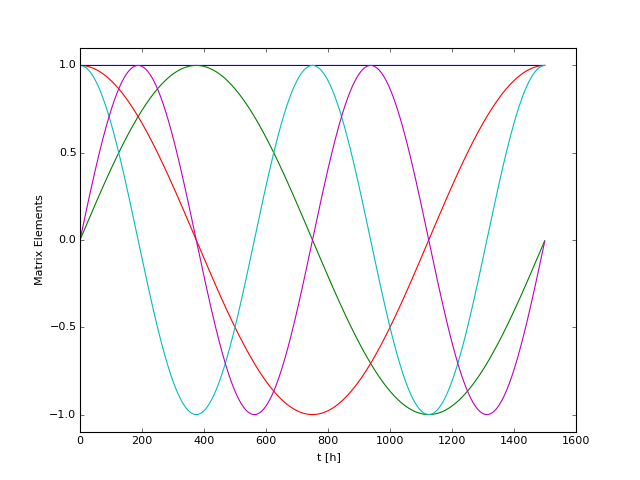

In [9]:
N = 1500
T = 1500*3600 # seconds

good = np.where(np.isfinite(dc))[0]
x=dc[good[:N]]
# get the canned FFT
Xcan = np.fft.fft(x)*T/N
# get the discrete FT from spectrum
f = np.linspace(0,N/2+0.2,N/2+1.)/T
F = np.zeros((N,N))
n = np.arange(0,N)
for k in np.arange(0,N/2+1):
    F[:,k] = np.cos(2*np.pi*k*n/N)
for k in np.arange(1,N/2-0.1):
    F[:,k+N/2] = np.sin(2*np.pi*k*n/N)
F=F

# plot the shape of some of the sine and cosines

fig,ax=plt.subplots()
ax.plot(n,F[:,[0,N/2+1,1,2,N/2+2]])
ax.set_ylim(np.array([-1.1,1.1]))
ax.set_xlabel('t [h]')
ax.set_ylabel('Matrix Elements')

(750,)
(751,)
(1500,)


<IPython.core.display.Javascript object>


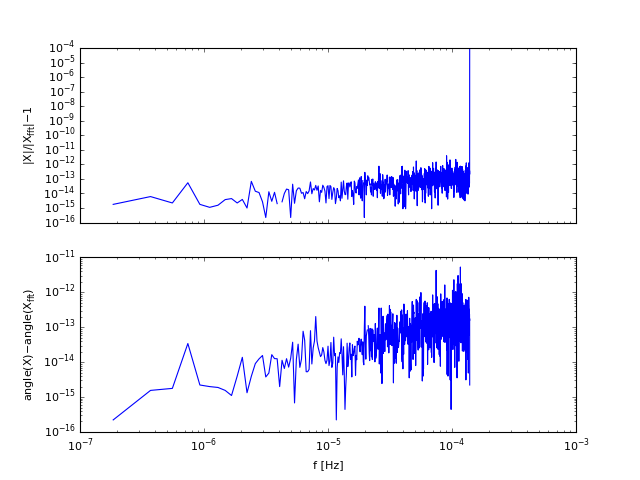

In [11]:
Xx = np.dot(np.linalg.inv(F)*N/2*T/N,x)
X=0.*Xcan
print np.shape(Xx[1:(N/2+1)])
X[0]=Xx[0]*2
X[-1]=Xx[-1]
for k in range(1,N/2):
    X[k]=Xx[k]-1j*Xx[k+N/2]

print np.shape(f)
print np.shape(X)

fig,axs=plt.subplots(2,1,sharex=True)

# compare the amplitudes of the canned and discrete FFTs
ax=axs[0]
ax.loglog(f,np.abs(np.abs(X[:N/2+1])/abs(Xcan[:N/2+1])-1.))
ax.set_ylim([1e-16,0.0001])
ax.set_ylabel(r'$|X|/|X_{fft}|-1$')

# compare the angles
ax=axs[1]
ax.loglog(f,abs(np.angle(X[:N/2+1])-np.angle(Xcan[:N/2+1])))
ax.set_ylabel(r'$angle(X)-angle(X_{fft})$')
ax.set_xlabel('f [Hz]')

The agreement between the `fft` and my implimentation was good to within machine precision.

In [12]:
# Do with for loop

<IPython.core.display.Javascript object>


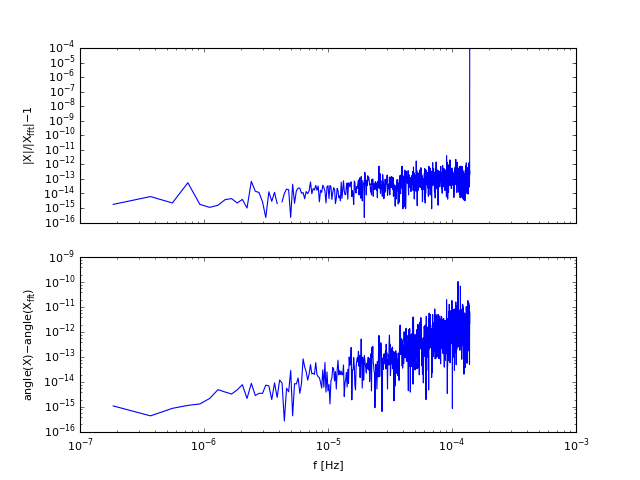

In [13]:
Xnew=Xcan*0.
Xnew[0]=T*np.mean(x)
n = np.arange(0,N)
for k in range(1,N/2+1):
    e = np.exp(-1j*2.*np.pi*k*n/N)
    Xnew[k]=T/N*np.sum(x*e)
fig,axs=plt.subplots(2,1,sharex=True)

ax=axs[0]
ax.loglog(f,np.abs(np.abs(X[:N/2+1])/abs(Xcan[:N/2+1])-1.))
ax.set_ylim([1e-16,0.0001])
ax.set_ylabel(r'$|X|/|X_{fft}|-1$')

ax=axs[1]
ax.loglog(f,abs(np.angle(Xnew[:N/2+1])-np.angle(Xcan[:N/2+1])))
ax.set_ylabel(r'$angle(X)-angle(X_{fft})$')
ax.set_xlabel('f [Hz]')

**2** Now, we can go ahead and use `np.fft.fft`.  Estimate the power spectrum for the Deep Cove time series (again go ahead and skip over gaps, though some of the bigs ones will screw up your frequencies a bit)

  - Use *all* the data.  
  - Report your results in proper SI units.
  - Indicate on your plot at least a couple of important frequencies

<IPython.core.display.Javascript object>


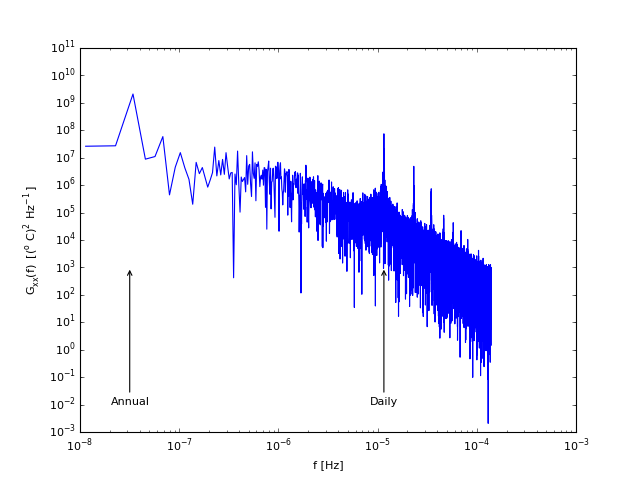

In [15]:
good = np.where(np.isfinite(dc))[0]
dt = 3600 # s
X = np.fft.fft(dc[good])*dt
N = len(good)
T = N*dt
Gxx = X*np.conj(X)*2/T
Gxx = np.abs(Gxx[:N/2+1])
f = np.linspace(0,N/2+0.2,N/2+1.)/T
fig,ax=plt.subplots(1,1)
ax.loglog(f,Gxx)
ax.annotate('Annual', xy=(1./3600/24/365, 1.e3),  xycoords='data',
                xytext=(1./3600/24/365, 1.e-2), textcoords='data',
                horizontalalignment='center',
                arrowprops=dict(arrowstyle="->")
                )
ax.annotate('Daily', xy=(1./3600/24, 1.e3),  xycoords='data',
                xytext=(1./3600/24, 1.e-2), textcoords='data',
                horizontalalignment='center',
                arrowprops=dict(arrowstyle="->")
                )
ax.set_xlabel('f [Hz]')
ax.set_ylabel(r'$G_{xx}(f)\ \ [(^oC)^2 Hz^{-1}]$')

We see a clear daily signal in the spectrum, and likely an annual signal too.  The spikes at higher frequencies are at harmonics of the daily frequency, and are due to the fact that the temperature signal is not a precise sine-wave.  

**3** Demonstrate Parceval's Theorem applies to your spectral estimate.  i.e. show that 

\begin{equation}
  \sigma_x^2=\int_0^{\infty} G_{xx}(f)\ \mathrm{d}f
\end{equation}

applies to your estimate of $G_{xx}(f)$.

In [17]:
print np.sum(Gxx[1:])*np.median(np.diff(f))
print np.var(dc[good])

36.8178619436
36.8172572917


## Q2: Emperically derive distribution of spectral estimate

**1** Write a short function to create a "red" time series by taking the cumulative sum of Normally distributed random data, and plot one realization.  The number of data points $N$ can be relatively small (say 1000).

<IPython.core.display.Javascript object>


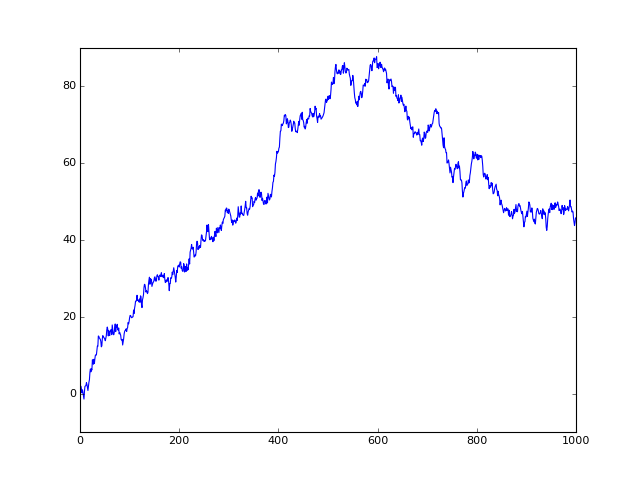

In [28]:
def red(N):
    return np.cumsum(np.random.randn(N))
x = red(1000)
fig,ax=plt.subplots()
ax.plot(x)

**2** Write a second function to return the estimate of the power spectrum of $x$.  For posterity sake, include a value of the sampling frequency, and return the proper frequencies for the estimate.  Plot the resulting spectrum.

<IPython.core.display.Javascript object>


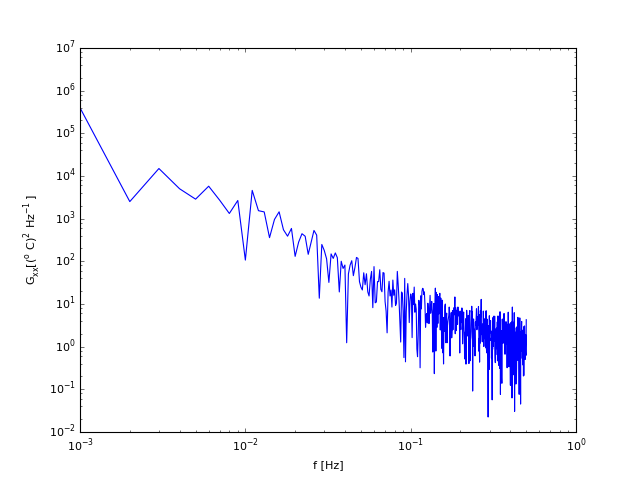

In [29]:
def ps(x,fs=1):
    X = np.fft.fft(x)/fs
    N=len(x)
    T = N/fs
    Gxx = X*np.conj(X)*2/T
    Gxx = np.abs(Gxx[:N/2+1])
    f = np.linspace(0,N/2+0.2,N/2+1.)/T
    return Gxx,f 
Gxx,f = ps(x)
fig,ax=plt.subplots(1,1)
ax.loglog(f,Gxx)
ax.set_xlabel('f [Hz]')
ax.set_ylabel(r'$G_{xx} [(^oC)^2 Hz^{-1}]$')


**3** Now do the Monte-Carlo, by running the above 100 times and plotting the resulting spectral estimates as dots on the same plot. As you are making your data, save it into an array.  I did something like:
```python
    Gxs = zeros((1000,501))
    # inside my loop:
        Gxs[ind,:]=Gxx   
```

<IPython.core.display.Javascript object>


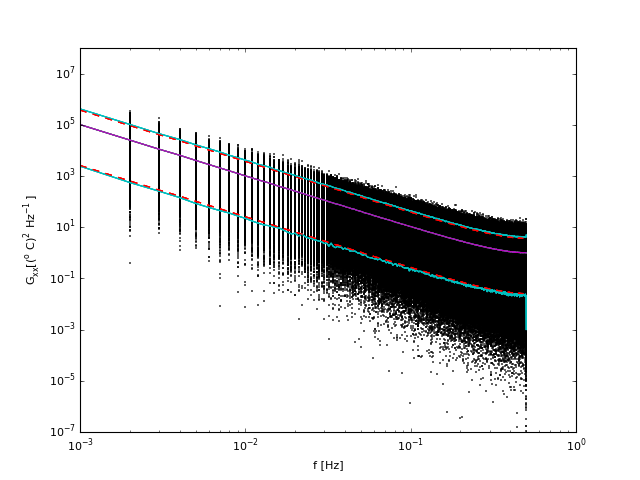

In [30]:
fig,ax=plt.subplots(1,1)
Gxs = np.zeros((10000,501))
for ind in range(10000):
    x = red(1000)
    Gxx,f=ps(x)
    ax.loglog(f,Gxx,'k.',markersize=2)
    Gxs[ind,:]=Gxx
ax.set_xlabel('f [Hz]')
ax.set_ylabel(r'$G_{xx} [(^oC)^2 Hz^{-1}]$')

**4** Now, on the same plot, add the mean of all your $G_{xx}(f)$ estimates (as a function of $f$), and the upper and lower bounds encompasing 95% of the data. (Hint, sort each column of your matrix - `np.sort` - and plot the value at $0.025 N$ and $0.975 N$).


In [35]:
import scipy.stats as stats

Gm=np.mean(Gxs,axis=0)
Gmed=np.median(Gxs,axis=0)
ax.loglog(f,Gm)

Gxsort  = np.sort(Gxs,axis=0)
lowe=Gxsort[np.floor(0.025*10000),:]
upe = Gxsort[np.floor((1-0.025)*10000),:]
ax.loglog(f,lowe,'c')
ax.loglog(f,upe,'c')
inter = stats.chi2.interval(0.95,df=2,scale=1.)
up =(1.+0.*Gm)*inter[1]/2.
dn = (1.+0.*Gm)*inter[0]/2.
ax.loglog(f,up*Gm,'r--')
ax.loglog(f,dn*Gm,'r--')
fig.show()


/Users/jklymak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/jklymak/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Note that the $\chi_2^2$ distribution is assymetric.  Therefore the distribution of data will have the opposite skewness to the error bars.  

**5** Show that the ratio of the lower and upper bounds of your spectral estimates spread compares favourably with the ratio between the lower and upper 95% confidence bounds of the  $\chi^2_2$ distribution.  Comment on any difference.

<IPython.core.display.Javascript object>


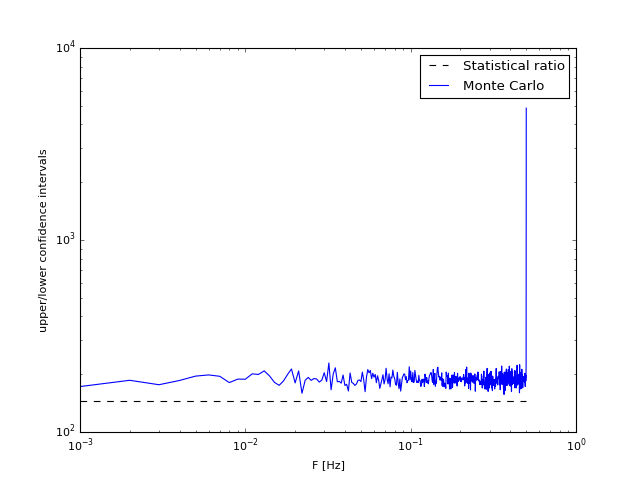

In [36]:
inter=stats.chi2.interval(0.95,df=2)
up = 2./inter[0]
dn = 2./inter[1]
fig,ax=plt.subplots(1,1)
ax.loglog(f,f*0+up/dn,'k--',label='Statistical ratio')
ax.loglog(f,upe/lowe,label='Monte Carlo')
ax.set_xlabel('F [Hz]')
ax.set_ylabel('upper/lower confidence intervals')
ax.legend()

I found that the variance in the Monte Carlo was slightly larger than the $\chi_2^2$ distribution indicated that it should be.